In [95]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [96]:
from tensorflow.keras.layers import Dense, Concatenate, LSTM, Lambda

In [97]:
from tensorflow.keras import Sequential, Model, Input
from tensorflow.keras.utils import plot_model


**Model to predict the type of songs - tap dance, ballet etc**

Input - audio and poses of a song
Output - type of song (ballet, tap etc) in the form of one hot encoding.

One hot encoding - Assume there are 4 types of dances- tap, ballet, hip hop and break. Heres how the outputs would look

0001 - tap

0010 - ballet

0100 - hip hop

1000 - break

In [98]:
import numpy as np
import librosa
import json

In [99]:
#labelling the data1

import os

folder_path = "/content/drive/MyDrive/Summer_Internship_Data/Datasets"  # Replace with the actual path to your "Datasets" folder
output_array = []

# Iterate over the files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith("_data.json"):  # Consider only files ending with "_data.json"
        name = filename.split("_data")[0]  # Extract the name by removing "_data" suffix
        dance_form = ''.join([i for i in name if not i.isdigit()])  # Remove numeric part from the name
        output_array.append(dance_form)

# Print the output array
sorted_array=sorted(output_array)
print(sorted_array)


['Ballet', 'Ballet', 'Ballet', 'Ballet', 'Ballet', 'Contemporary', 'Contemporary', 'Contemporary', 'Contemporary', 'Contemporary', 'HipHop', 'HipHop', 'HipHop', 'HipHop', 'HipHop', 'HipHop', 'Salsa', 'Salsa', 'Salsa', 'Salsa', 'Salsa', 'Tap', 'Tap', 'Tap', 'Tap', 'Tap']


In [100]:
pose_data_file = "/content/drive/MyDrive/Summer_Internship_Data/Datasets/Contemporary4_data.json"
with open(pose_data_file, "r") as f:
    pose_data = json.load(f)

# Load the audio files and preprocess them (e.g., convert to mel spectrograms)
# audio_files = ["path/to/audio1.wav", "path/to/audio2.wav", ...]
audio_files = [
    "/content/drive/MyDrive/Summer_Internship_Data/Processed_audios/Contemporary1_processed.wav",
    "/content/drive/MyDrive/Summer_Internship_Data/Processed_audios/Contemporary2_processed.wav",
    "/content/drive/MyDrive/Summer_Internship_Data/Processed_audios/Contemporary3_processed.wav",
    "/content/drive/MyDrive/Summer_Internship_Data/Processed_audios/Contemporary4_processed.wav",
    "/content/drive/MyDrive/Summer_Internship_Data/Processed_audios/Contemporary5_processed.wav"
]
preprocessed_audio = []
for audio_file in audio_files:
    audio, sr = librosa.load(audio_file, sr=None)  # Load audio file
    spectrogram = librosa.feature.melspectrogram(y=audio, sr=sr)  # Convert to mel spectrogram
    preprocessed_audio.append(spectrogram)


In [101]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import numpy as np

output_array = ['ballet', 'contemporary', 'hip hop', 'salsa', 'tap']

# Initialize the one-hot encoder
onehot_encoder = OneHotEncoder(sparse=False)

# Fit and transform the output array with one-hot encoder
onehot_encoded = onehot_encoder.fit_transform(np.array(sorted_array).reshape(-1, 1))

# Print the one-hot encoded array
print(onehot_encoded)


[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]]


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [102]:
print(len(pose_data))
print(len(audio_files))
print(len(sorted_array))

5384
5
26


In [103]:
# model_pose = Sequential(
#     [
#       LSTM(128, activation = 'relu', return_sequences=True),
#       LSTM(64, activation = 'relu', return_sequences=False),
#       Dense(128, activation = 'relu'),
#       Dense(32),
#     ]
# )

In [104]:
# model_audio = Sequential(
#     [
#         LSTM(128, activation = 'relu', return_sequences=True),
#         LSTM(64, activation = 'relu', return_sequences=False),
#         Dense(32),
#     ]
# )

In [105]:
# pose_input = Input(shape=(128, 3))
# audio_input = Input(shape=(128, 13700))

# x1 = model_pose(pose_input)
# x2 = model_audio(audio_input)
# x = Concatenate(axis=1)([x1, x2])
# x = Dense(64, activation = 'relu') (x)
# x = Dense(32, activation = 'relu')(x)
# x = Dense(4, activation = 'sigmoid')(x)

# model = Model(inputs=[pose_input, audio_input], outputs=[x])

In [106]:
# model.summary()

In [107]:
# arr_shape = pose_input.shape

# # Print the shape
# print(arr_shape)

In [108]:
# arr_shape = audio_input.shape

# # Print the shape
# print(arr_shape)

In [109]:
# plot_model(model, show_shapes = True)

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_11 (InputLayer)          [(None, 33, 3)]      0           []                               
                                                                                                  
 input_12 (InputLayer)          [(None, 128, 17183)  0           []                               
                                ]                                                                 
                                                                                                  
 sequential_16 (Sequential)     (None, 32)           129440      ['input_11[0][0]']               
                                                                                                  
 sequential_17 (Sequential)     (None, 32)           8915232     ['input_12[0][0]']         

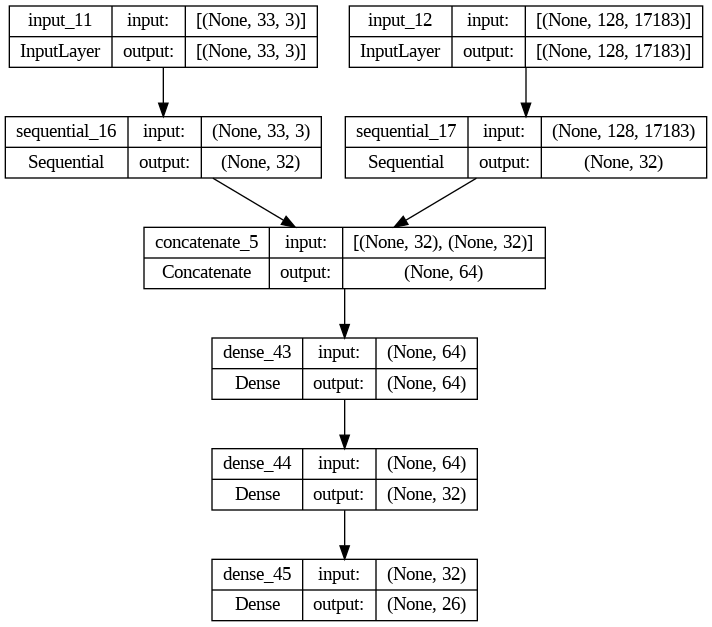

In [110]:
import numpy as np
import librosa
from tensorflow.keras.layers import Input, Dense, LSTM, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model

# Convert pose_data to a numpy array
pose_data = np.array(pose_data)

# Define the shape of the input array
pose_input_shape = (pose_data.shape[0], pose_data.shape[1], pose_data.shape[2])

# Adjust the model_pose to match the input shape
model_pose = Sequential(
    [
        LSTM(128, activation='relu', return_sequences=True, input_shape=pose_input_shape[1:]),
        LSTM(64, activation='relu', return_sequences=False),
        Dense(128, activation='relu'),
        Dense(32)
    ]
)

# Preprocess audio_files to extract audio features (example using librosa)
audio_features = []
max_length = 0
for audio_file in audio_files:
    audio, sr = librosa.load(audio_file, sr=None)  # Load audio file
    # Perform audio feature extraction (e.g., MFCCs, spectrogram)
    features = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=128)
    audio_features.append(features)
    max_length = max(max_length, features.shape[1])

# Pad the audio features to the maximum length
padded_audio_features = []
for features in audio_features:
    pad_width = max_length - features.shape[1]
    padded_features = np.pad(features, pad_width=((0, 0), (0, pad_width)))
    padded_audio_features.append(padded_features)

# Convert padded_audio_features to a numpy array
audio_features = np.array(padded_audio_features)

# Define the audio_input shape based on the audio feature shape
audio_input_shape = audio_features.shape[1:]

# Adjust the model_audio to match the input shape
model_audio = Sequential(
    [
        LSTM(128, activation='relu', return_sequences=True, input_shape=audio_input_shape),
        LSTM(64, activation='relu', return_sequences=False),
        Dense(32)
    ]
)

# Define the input layers
pose_input = Input(shape=pose_input_shape[1:])
audio_input = Input(shape=audio_input_shape)

# Pass the input through the models
x1 = model_pose(pose_input)
x2 = model_audio(audio_input)

# Concatenate the outputs
x = Concatenate(axis=1)([x1, x2])
x = Dense(64, activation='relu')(x)
x = Dense(32, activation='relu')(x)
x = Dense(len(sorted_array), activation='sigmoid')(x)  # Adjust the output shape

# Create the model
model = Model(inputs=[pose_input, audio_input], outputs=[x])

# Print the model summary
model.summary()

# Plot the model architecture
plot_model(model, show_shapes=True)


In [111]:
# from sklearn.model_selection import train_test_split
# from tensorflow.keras.optimizers import Adam

# # Split the data into training and testing sets
# x_train_pose, x_test_pose, x_train_audio, x_test_audio, y_train, y_test = train_test_split(
#     pose_data, audio_features, sorted_array, test_size=0.2, random_state=42
# )

# # Compile the model
# model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# # Train the model
# history = model.fit(
#     [x_train_pose, x_train_audio],
#     y_train,
#     batch_size=32,
#     epochs=2,
#     validation_data=([x_test_pose, x_test_audio], y_test)
# )

# # Evaluate the model on the testing set
# loss, accuracy = model.evaluate([x_test_pose, x_test_audio], y_test)

# print(f"Test Loss: {loss:.4f}")
# print(f"Test Accuracy: {accuracy:.4f}")


In [112]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

# Split the data into training and testing sets
x_train_pose, x_test_pose, x_train_audio, x_test_audio, y_train, y_test = train_test_split(pose_data, audio_features, sorted_array, test_size=0.2)

# Compile the model
model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['accuracy'])

# Train the model
model.fit([x_train_pose, x_train_audio], y_train, batch_size=32, epochs=2, validation_data=([x_test_pose, x_test_audio], y_test))


ValueError: ignored

**Model to predict similarity between 2 songs using Siamese Network**<br/>
Input - there are 4 inputs: audio of song 1, poses of song 1, audio of song 2 and video of song 2. <br/>
Output - A score between 0 & 1 of how similar 2 songs are. <br/>

How to use:
Predict the score for ever pair of songs. If given a song (audio and video) you are asked to recommend another song, just return the song that has the highest similarity score with your given song.

How to train: Watch this youtube video https://www.youtube.com/watch?v=6jfw8MuKwpI&pp=ygUZYW5kcmV3IG5nIHNpYW1lc2UgbmV0d29yaw%3D%3D


In [ ]:
extract_features = Model(inputs = [pose_input, audio_input], outputs = model.layers[-2].output)

In [ ]:
from tensorflow.keras import backend as K

pose_input_0 = Input(shape=(128, 3))
audio_input_0 = Input(shape=(128, 13700))
pose_input_1 = Input(shape=(128, 3))
audio_input_1 = Input(shape=(128, 13700))

features_1 = extract_features([pose_input_0, audio_input_0])
features_2 = extract_features([pose_input_1, audio_input_1])

def cosine_similarity(vectors):
    x, y = vectors
    x = K.l2_normalize(x, axis=-1)
    y = K.l2_normalize(y, axis=-1)
    return K.sum(x * y, axis=-1, keepdims=True)

similarity = Lambda(cosine_similarity)([features_1, features_2])

# Create the Siamese network
siamese_model = Model(inputs=[pose_input_0, audio_input_0, pose_input_1, audio_input_1], outputs=similarity)

In [ ]:
plot_model(siamese_model, show_shapes=True)